### PCA - Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
tit = sns.load_dataset('titanic')
tit = tit[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
adult = tit[tit.age >= 20]
tit.age.fillna(adult.age.mean().round(1), inplace=True)
tit.embarked.fillna('S', inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tit.sex = le.fit_transform(tit.sex)
tit.embarked = le.fit_transform(tit.embarked)
X = tit.iloc[:, 1:].values
y = tit.survived.values
from sklearn.preprocessing import StandardScaler
tit_std = StandardScaler().fit_transform(X)
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2023
    )
    rfc = RandomForestClassifier(random_state=2023)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [4]:
from sklearn.decomposition import PCA
def pca(n):
    pca = PCA(n_components=n)
    tit_pca = pca.fit_transform(tit_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(tit_pca, y)
    print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{acc:.4f}')

In [5]:
for i in range(2, 7):
    pca(i)

PCA2: 설명력-0.5090, 정확도-0.7877
PCA3: 설명력-0.6475, 정확도-0.7486
PCA4: 설명력-0.7669, 정확도-0.7542
PCA5: 설명력-0.8670, 정확도-0.7765
PCA6: 설명력-0.9470, 정확도-0.8045


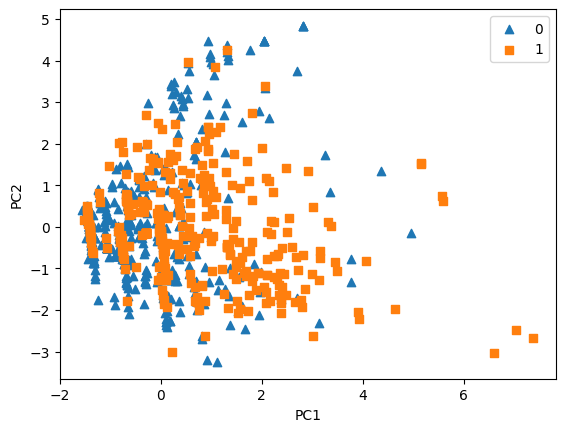

In [6]:
pca = PCA(2)
tit_pca = pca.fit_transform(tit_std)
df = pd.DataFrame(tit_pca, columns=['PC1', 'PC2'])
df['target'] = y
markers = ['^', 's']
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=i)

plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.show()

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=2023, n_init='auto')
kmeans.fit(tit_std)
df['cluster'] = kmeans.labels_

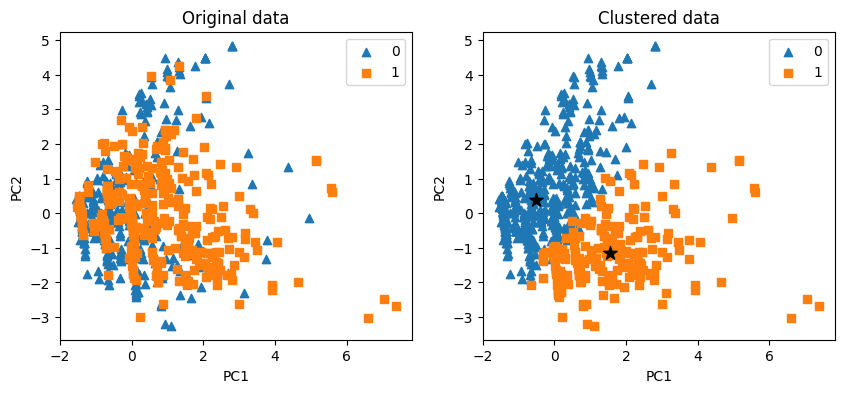

In [8]:
markers = ['^', 's']
plt.figure(figsize=(10, 4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=i)
        else:
            plt.scatter(x_data, y_data, marker=marker, label=i)
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title('Original data')
    else:
        plt.title('Clustered data')
plt.show()

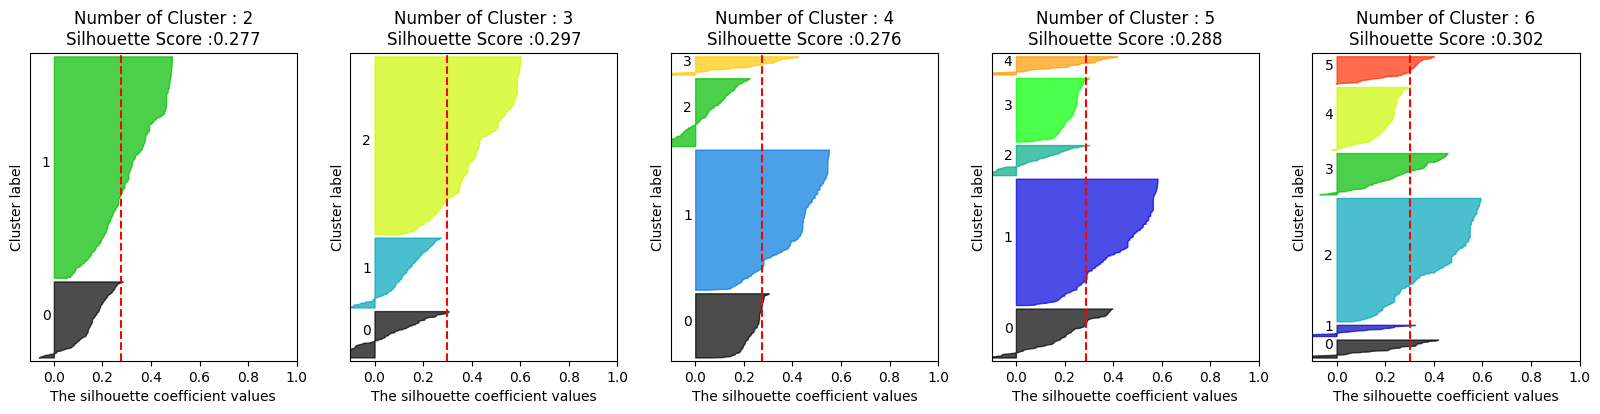

In [9]:
import warnings
warnings.filterwarnings('ignore')
from visualize import visualize_silhouette
visualize_silhouette([2, 3, 4, 5, 6], tit_std)